In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree as sk_tree
import matplotlib.pyplot as plt

### Decision Tree

In [3]:
df=pd.read_csv('cleaned_data_Data_Scientist_Salary.csv')
column=["Python","spark","aws","excel","sql","sas","keras","pytorch","scikit","tensor","hadoop","tableau","bi","flink","mongo","google_an","Avg Salary(K)","seniority_by_title"]
df_copy=df.copy()
df1=df_copy[column]
df1=df1[df1["seniority_by_title"]=="sr"].reset_index()
df1=df1.drop(columns="seniority_by_title")
df1

,index,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Avg Salary(K)
0,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,96.000000
1,38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,147.500000
2,44,1,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,130.000000
3,46,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,100.626011
4,60,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,107.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,728,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.000000
216,733,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,138.500000
217,736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111.500000
218,737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,84.500000


In [11]:
# Chia dữ liệu thành dữ liệu đầu vào và đầu ra
X = df1.drop(columns=["Avg Salary(K)"]).values
y = df1["Avg Salary(K)"].values
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_dec = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dec)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 533.7651330710829


### XG Boost

In [23]:
# Khởi tạo XGBoost Regressor
xg_reg = xgb.XGBRegressor(max_depth=8, learning_rate=0.2, n_estimators=5, random_state=42)
# Huấn luyện mô hình
xg_reg.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred_xg = xg_reg.predict(X_test)
# Đánh giá mô hình bằng Mean Squared Error
mse = mean_squared_error(y_test, y_pred_xg)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 483.043945369207


### Visualize Decision Tree

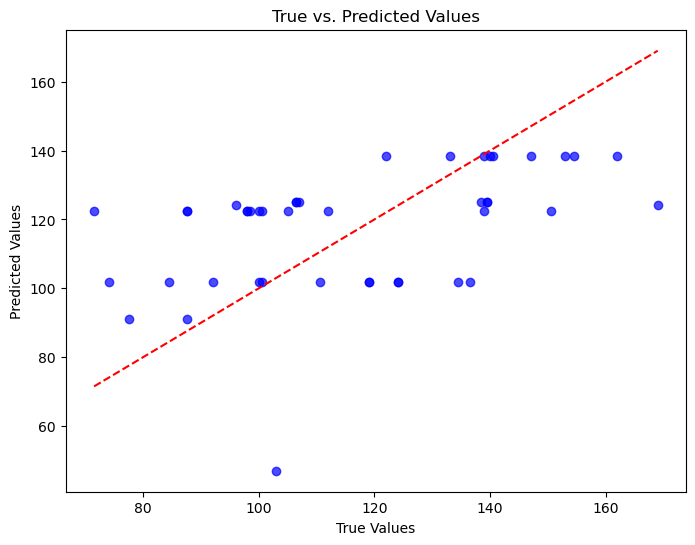

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dec, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for ideal predictions
plt.title("True vs. Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

### Nhận xét:
- Phân tán Dữ liệu: Các điểm dữ liệu màu xanh cho thấy có sự phân tán xung quanh đường hồi quy màu đỏ, điều này chỉ ra rằng mô hình có độ chính xác không cao trong việc dự đoán giá trị.
- Đường Hồi Quy: Đường hồi quy màu đỏ biểu thị mối quan hệ giữa giá trị thực tế và dự đoán, nhưng sự không chặt chẽ của các điểm dữ liệu cho thấy mô hình có thể cần được tinh chỉnh thêm.
- Giá Trị Thực Tế vs. Dự Đoán: Trục x (Giá Trị Thực Tế) và trục y (Giá Trị Dự Đoán) có cùng phạm vi từ 60 đến 160, cho thấy mô hình được thiết kế để dự đoán trong phạm vi giá trị này.
Cải Thiện Mô Hình: Việc tối ưu hóa các tham số của mô hình decision tree hoặc sử dụng thêm các kỹ thuật học máy khác có thể giúp cải thiện độ chính xác của dự đoán

### Visualize XG Boost

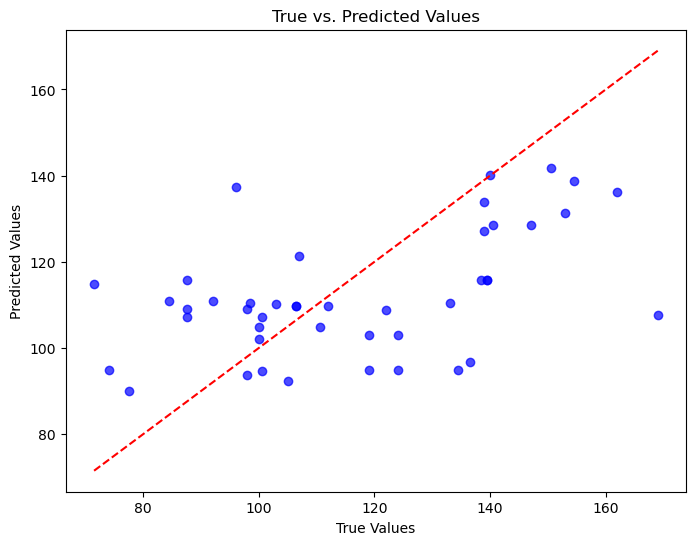

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xg, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for ideal predictions
plt.title("True vs. Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

### Nhận xét:
- Phân tán Dữ liệu: Các điểm dữ liệu màu xanh trên biểu đồ cho thấy mối quan hệ giữa giá trị thực tế và dự đoán. Sự phân tán của các điểm dữ liệu quanh đường hồi quy màu đỏ cho thấy mô hình có độ chính xác tốt nhưng vẫn còn phòng cải thiện.
- Đường Hồi Quy: Đường hồi quy màu đỏ chạy chéo qua biểu đồ, thể hiện mối quan hệ lý tưởng nơi giá trị thực tế bằng giá trị dự đoán. Điều này cho thấy mô hình XGBoost đã học được mối quan hệ tổng quát giữa dữ liệu.
- Giá Trị Thực Tế vs. Dự Đoán: Trục x và trục y có cùng phạm vi từ 80 đến 160, điều này cho thấy mô hình được đánh giá trên một phạm vi giá trị cụ thể.